In [1]:
%matplotlib inline

In [20]:
from boilerplate import *
import os, sys
import functional_vectorizer
from dio import dataio
from scipy import fftpack, signal
from imp import reload
style.use('dark_background')

In [74]:
# LSTM and CNN for sequence classification in the IMDB dataset
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Convolution1D, Convolution2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
assert 0, 'dont run'
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [111]:
# data = np.load('/run/media/mike/Elements/data/kaggle/melbourne/vectors/simple_fft_vectorizedata_train_1_X.npy')
# data = np.load('/home/mike/ve/ml/vec_sampen_9598_376.npy')
# Y = np.load('/run/media/mike/Elements/data/kaggle/melbourne/vectors/simple_fft_vectorizedata_train_1_Y.npy')
data, Y = dataio.reload_with_labels('/home/mike/ve/ml/vec_sampen_9598_376')

In [13]:
print(data.shape, Y.shape, np.mean(Y, axis=0))

((6041, 16384), (6041, 1), array([ 0.07432544]))


In [17]:
data = data.reshape(data.shape[0], -1, 16)

In [27]:
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
mean.shape

(1024, 16)

In [30]:
zdata = (data - mean) / std
zdata = np.nan_to_num(zdata)
zdata.shape

/home/mike/ve/ml/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


(6041, 1024, 16)

''

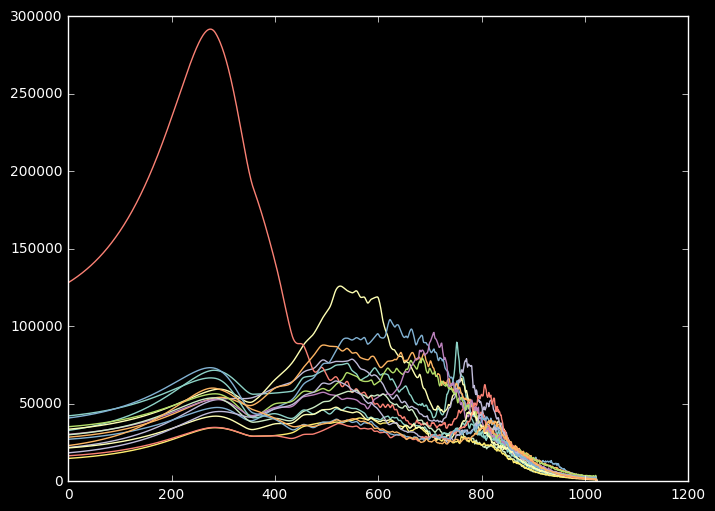

In [25]:
plt.plot(data[120])
''

''

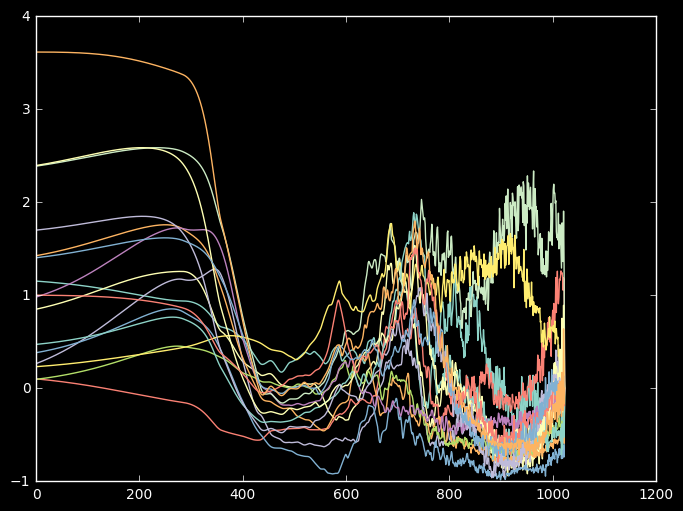

In [35]:
plt.plot(zdata[180])
''

In [8]:
# data = dataio.get_matlab_eeg_data_ary('/home/mike/data/train/1_1001_0.mat')

In [9]:
data.shape

(1301, 6000)

''

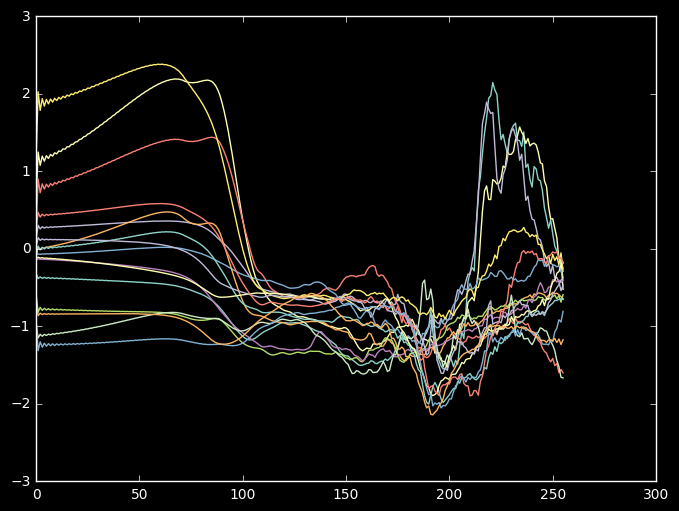

In [63]:
ds = signal.resample(zdata[0:], 256, axis=1)
plt.plot(ds[0])
''

In [65]:

embedding_vecor_length = 32
n_input_len=ds.shape[1]
model = Sequential()
# model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Convolution1D(nb_filter=64, filter_length=8, input_dim=1, 
                        input_length=n_input_len, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(LSTM(100))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution1d_3 (Convolution1D)  (None, None, 64)      1088        convolution1d_input_3[0][0]      
____________________________________________________________________________________________________
maxpooling1d_3 (MaxPooling1D)    (None, None, 64)      0           convolution1d_3[0][0]            
____________________________________________________________________________________________________
lstm_3 (LSTM)                    (None, 100)           66000       maxpooling1d_3[0][0]             
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 2)             202         lstm_3[0][0]                     
Total params: 67290
_______________________________________________________________________

In [124]:

embedding_vecor_length = 32
n_input_len=ds.shape[1]
in_shape=ds[0].shape
print('input shape: ', in_shape)
model = Sequential()
# model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
# model.add(Convolution2D(nb_filter=64, nb_row=4, nb_col=4, dim_ordering='th',
#                         input_shape=in_shape[1:], border_mode='same', activation='relu'))
model.add(Convolution1D(nb_filter=64, filter_length=8, input_dim=16, 
                        input_shape=(n_input_len, 256, 16), border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(LSTM(64))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

('input shape: ', (256, 16))
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution1d_9 (Convolution1D)  (None, None, 64)      8256        convolution1d_input_9[0][0]      
____________________________________________________________________________________________________
maxpooling1d_11 (MaxPooling1D)   (None, None, 64)      0           convolution1d_9[0][0]            
____________________________________________________________________________________________________
lstm_9 (LSTM)                    (None, 64)            33024       maxpooling1d_11[0][0]            
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 64)            4160        lstm_9[0][0]                     
______________________________________________________________

In [101]:
os.chdir('/home/mike/ve/ml/')
from eegkaggle.dio import dataio
reload(dataio)

<module 'eegkaggle.dio.dataio' from 'eegkaggle/dio/dataio.pyc'>

In [112]:
reload(dataio)
print(zdata.shape, Y.shape)
d0, d1, dt = dataio.separate_sets(zdata, Y)
print(d0.shape, d1.shape)
x,y = dataio.subdiv_and_shuffle(zdata, Y, resample='up', merge=False, shuffle=False) # let keras shuffle
# x = zdata
# y = Y

((6041, 1024, 16), (6041, 1))
((5592, 1024, 16), (449, 1024, 16))
new set:  (11429, 1024, 16)
label shapes:  (5592, 1) (5837, 1) 11429


In [113]:
print(x.shape, y.shape)

((11429, 1024, 16), (11429, 1))


In [114]:
np.mean(y, axis=0)

array([ 0.51071835])

In [115]:
y

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 1.],
       [ 1.],
       [ 1.]])

In [116]:
Yv = np.asarray(y == 1).ravel()
print(Yv)
Yv = np.stack([Yv, ~Yv], axis=1)
print(Yv.shape)
Yv = np.array(Yv, dtype=int)
print(Yv.shape)
np.mean(Yv[:,0])

[False False False ...,  True  True  True]
(11429, 2)
(11429, 2)


0.51071834806194771

In [117]:
print(x.shape, Yv.shape)

((11429, 1024, 16), (11429, 2))


In [ ]:
X_train = x
# X_train = x.reshape(-1, 256,1)
# X_train /= np.amax(X_train)
y_train = Yv # .reshape(-1, 2)
print(X_train.shape, y_train.shape)
ones_rate = np.mean(Yv[:,0])
class_weight= {0:1./(1-ones_rate), 1:1./ones_rate}
print(class_weight)
model.fit(X_train, y_train, nb_epoch=3, batch_size=64, shuffle=True, class_weight=class_weight, validation_split=0.2 )

((11429, 1024, 16), (11429, 2))
{0: 2.0438125894134478, 1: 1.9580263834161382}
Train on 9143 samples, validate on 2286 samples
Epoch 1/3
5696/9143 [=================>............] - ETA: 66s - loss: 1.2607 - acc: 0.6492

In [99]:
pr = model.predict_classes(X_train)

6041/6041 [==============================] - 51s    


In [100]:
np.sum(pr)

6041

In [151]:
pr.shape

(2344,)

In [157]:
np.mean(pr == y_train[:,1]) # MOMENT OF TRUUUUUTH!!!!!!

0.67875426621160406